In [1]:
import numpy as np
import matplotlib.pyplot as plt
from function_definitions import *

In [68]:
def finite_difference(kappa,dz,N0):
    '''Set up the arrays for 1D finite difference solver
    Uses a Dirichlet bottom boundary condition and a Neumann surface 
    condition (to model nutrients entering from ocean bottom)
    
    Inputs:
    kappa:           float: diffusivity
    dz:              float: grid spacing
    N0:               float: bottom boundary value
    
    Output:
    A:      numpy array: left-hand side 
    b:      numpy array: right-hand side
    '''
    
    d1 = -(kappa[:-1] + kappa[1:]) # diagonal entries
    d1 = np.append(-kappa[0],d1)
    
    A = (1/dz**2)*(np.diag(d1)+np.diag(kappa[:-1],1)+np.diag(kappa[:-1],-1))
    b = np.zeros(kappa.shape)
    b[-1] = b[-1]-N0*(kappa[-1]/dz**2)

    return A, b

def diffusion(kappa,dz,dt,N0,N):
    '''Solve diffusion equation in 1D using forward Euler time stepping
    
    Inputs:
    kappa:           float: diffusivity
    dz:              float: grid spacing
    dt:              float: time step
    N0:              float: bottom boundary value of nutrient
    N:               float: array of values at current time-step
    
    Output:
    Nj:              float: array of values at next time-step
    '''
    Nj = N
    d = kappa*dt/dz**2
    # Compute arrays for diffusion
    Njp1 = np.append(Nj[1:],N0) # Dirichlet boundary condition (fixed value)
    Njm1 = np.append(Nj[0],Nj[:-1]) # Neumann boundary condition (no-flux)
    # Time stepping
    Nj = d*Njp1+(1-2*d)*Nj+d*Njm1
    
    return Nj

In [4]:
H = -1; # depth of water (1 = non-dimensional)
K = 20; # number of grid points
grid = np.linspace(0,H,K) # grid array
kappa = 0.01 # diffusivity value
dz = H/(K-1); # calculate grid spacing
N0 = 1; # bottom boundary condition on nutrient
N = np.zeros(grid.shape) # initial condition
Nsave = [N] # save initial condition
dt = 0.01 # time step
nt = 500 # number of time steps
time = np.arange(nt+1)*dt
for t in np.arange(nt):
    N = diffusion(kappa,dz,dt,N0,N)
    Nsave = np.concatenate((Nsave,[N]),axis = 0)

Text(0, 0.5, 'depth of water column')

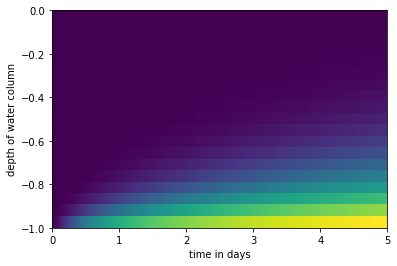

In [5]:
plt.pcolor(time,grid,Nsave.T)
plt.xlabel('time in days')
plt.ylabel('depth of water column')